<a href="https://colab.research.google.com/github/pareshrchaudhary/numericalmethods/blob/main/Limits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Limits

**As $x$ gets closer to $c$, $f(x)$ tends to $b$**  


$\lim_{{x \to c}} f(x) = b $

## Limits Idea
Let's define a function that is decently complex -


$f(x) = \frac{\sqrt{3-5x + x^2 + x^3}}{x-1}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

def f(x):
  y = np.sqrt(3 - 5 * x + x ** 2 + x ** 3) / (x - 1)
  return y

Let's see what happens to $f(x)$ output when $x$ moves closer and closer to a value.

### Left Hand Side Limit

In [2]:
value = 1

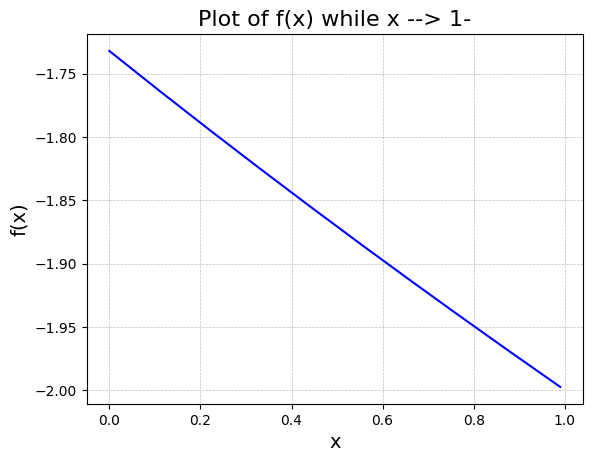

In [3]:
x_left = np.linspace(0, value-0.01, 10)
fn_left = [f(x) for x in x_left]

plt.plot(x_left, fn_left, color='blue')
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x)', fontsize=14)
plt.title('Plot of f(x) while x --> 1-', fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.show()

As $x$ starts from left side towards $1$ the output of $f(x)$ moves towards $-2$.

Let's try the same from the right hand side.

### Right Hand Side Limit

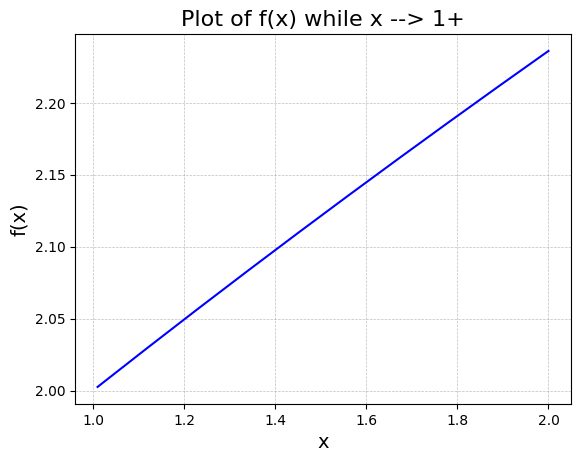

In [4]:
x_right = np.linspace(2, value+0.01, 10)
fn_right = [f(x) for x in x_right]

plt.plot(x_right, fn_right, color='blue')
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x)', fontsize=14)
plt.title('Plot of f(x) while x --> 1+', fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.show()

As $x$ starts from right side towards $1$ the output of $f(x)$ moves towards $2$.

Okay but what about f(1)?

### At value

In [5]:
f(1)  #  Apparently there is a warning thrown

<ipython-input-1-dd92c93d5efe>:6: RuntimeWarning: invalid value encountered in double_scalars
  y = np.sqrt(3 - 5 * x + x ** 2 + x ** 3) / (x - 1)


nan

Why are we getting "nan"?

If you look at the $f(1)$,

$\frac{\sqrt{3-5*1 + 1^2 + 1^3}}{"1"-1}$ if we are exactly at $1$ then the denominator becomes $1-1 = 0$ and anything divided by zero is not possible so solution to f(1) does not exist.

### Combining LHS, RHS and at value

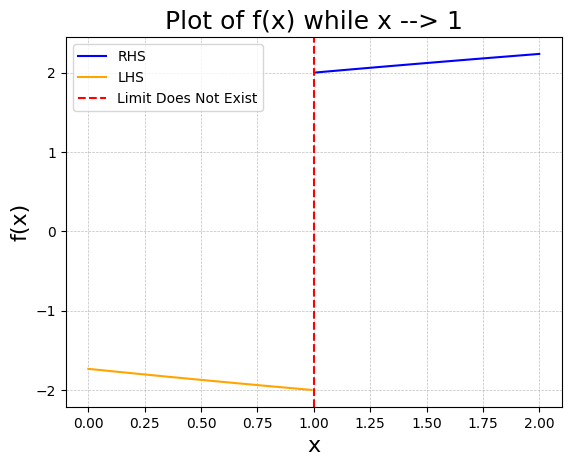

In [6]:
x_left = np.linspace(0, value-0.01, 10)
fn_left = [f(x) for x in x_left]

x_right = np.linspace(2, value+0.01, 10)
fn_right = [f(x) for x in x_right]

plt.plot(x_right, fn_right, color='blue', label='RHS')
plt.plot(x_left, fn_left, color='orange', label='LHS')
plt.axvline(x=value, color='red', linestyle='--', label='Limit Does Not Exist')
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.title('Plot of f(x) while x --> 1', fontsize=18)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.legend()
plt.show()

## Limit behaviors

$\lim_{{x \to c}} f(x) = b $


1.   When $f(x)$ does not approach any specific value then the limit does not exist.
2.   When $f(x)$ does not exist, limit could still hold as we are interested in what happens when $x$ in near $c$.

Overall limit does not exist if either left limit or right limit does not exist or if they are not the same.


$\boxed{\text{Iff Left Limit } \lim_{{x \to c^-}} f(x) = b, \text{ Right Limit } \lim_{{x \to c^+}} f(x) = b \text{, then, } \lim_{{x \to c}} f(x) = b}$


In [7]:
def g(x):
  return 1/x

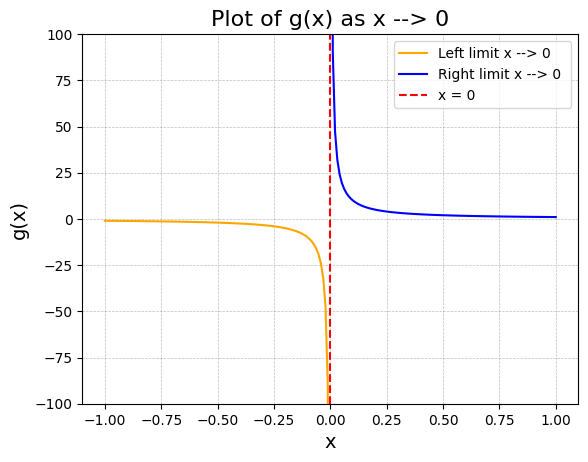

In [8]:
x_left = np.linspace(-1, 0-0.001, 100)
x_right = np.linspace(0+0.001, 1, 100)

plt.plot(x_left, g(x_left), label='Left limit x --> 0', color='orange')
plt.plot(x_right, g(x_right), label='Right limit x --> 0 ', color='blue')
plt.axvline(x=0, color='red', linestyle='--', label='x = 0')
plt.xlabel('x', fontsize=14)
plt.ylabel('g(x)', fontsize=14)
plt.title('Plot of g(x) as x --> 0', fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.legend()
plt.ylim(-100, 100)
plt.show()

**Limit does not exist here.**

## Continuity

We say $f(x)$ is continuous at a point $x = c$ if  
$\lim_{{x \to c}} f(x) = f(c) $

The function $f(x) = \frac{\sqrt{3-5x + x^2 + x^3}}{x-1}$ is discontinuous at $x = 1$

In [9]:
def f(x):
  y = np.sqrt(3 - 5 * x + x ** 2 + x ** 3) / (x - 1)
  return y

In [10]:
def limit(func, point):
  left = func(point - 1e-6)
  right = func(point + 1e-6)

  left_limit = round(left, 4)
  right_limit = round(right, 4)

  if (left_limit == right_limit):
      return True, (left_limit + right_limit) / 2
  else:
      return False, None

In [11]:
point = 1
print(limit(f, point)[1] == f(point))

False


<ipython-input-9-5b04db144074>:2: RuntimeWarning: invalid value encountered in double_scalars
  y = np.sqrt(3 - 5 * x + x ** 2 + x ** 3) / (x - 1)


In [12]:
point = 2
print(math.isclose(limit(f, point)[1], f(point), rel_tol=1e-3, abs_tol=1e-3))

True


## Limit Laws

In [62]:
def f(x):
  return x**2

def g(x):
  return 4*x**2

In [120]:
class Limits():
  def __init__(self, epsilon=1e-6):
    self.epsilon = epsilon

  def calculate_limit(self, func, point):
    return func(point - 1e-6), func(point + 1e-6)

  def evaluate_limit(self, func, point):
    left_limit, right_limit = self.calculate_limit(func, point)

    if (math.isclose(left_limit, right_limit, rel_tol =1e-4)):
      return True, (left_limit + right_limit) / 2
    else:
      return False, None

  def add(self, func1, func2, point):
    def add_function(x):
      return func1(x) + func2(x)
    return self.evaluate_limit(add_function, point)

  def subtract(self, func1, func2, point):
    def sub_function(x):
      return func1(x) - func2(x)
    return self.evaluate_limit(sub_function, point)

  def mul(self, func1, func2, point):
    def mul_function(x):
      return func1(x) * func2(x)
    return self.evaluate_limit(mul_function, point)

  def div(self, func1, func2, point):
    def div_function(x):
      if func2(x) == 0:
        raise ValueError("Division by zero is not allowed.")
      return func1(x) / func2(x)
    return self.evaluate_limit(div_function, point)

In [121]:
point = 5
lim = Limits()
limit_f = lim.evaluate_limit(f, 5)[1]
limit_g = lim.evaluate_limit(g, 5)[1]

### 1) Addition

$\lim_{{x \to c}} f(x) = M$    
$\lim_{{x \to c}} g(x) = N$

$\lim_{{x \to c}} (f(x) + g(x)) = M + N$

In [113]:
limit_f + limit_g

125.000000000005

In [114]:
lim.add(f, g, point)

(True, 125.000000000005)

### 2) Subtraction

$\lim_{{x \to c}} f(x) = M$    
$\lim_{{x \to c}} g(x) = N$

$\lim_{{x \to c}} (f(x) - g(x)) = M - N$

In [115]:
limit_f - limit_g

-75.00000000000301

In [116]:
lim.subtract(f, g, point)

(True, -75.00000000000301)

### 3) Multiplication

$\lim_{{x \to c}} f(x) = M$    
$\lim_{{x \to c}} g(x) = N$

$\lim_{{x \to c}} (f(x) * g(x)) = M * N$

In [117]:
limit_f * limit_g

2500.0000000002005

In [118]:
lim.mul(f, g, point)

(True, 2500.0000000006003)

### 4) Division

$\lim_{{x \to c}} f(x) = M$    
$\lim_{{x \to c}} g(x) = N$

If $N \ne 0$ then
$\lim_{{x \to c}} (\frac {f(x)}  {g(x)} ) = \frac {M}{N}$

In [119]:
limit_f / limit_g

0.25

In [122]:
lim.div(f, g, point)

(True, 0.25)